# Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Defining Constants

In [2]:
# Prewitt Filters, here I am cnsidering 3x3 filters
# Prewitt Filter in X-direction
Px = np.array([[1, 1, 1],
      [0, 0, 0],
      [-1, -1, -1]])
# Prewitt Filter in Y-direction
Py = np.array([[1, 0, -1],
      [1, 0, -1],
      [1, 0, -1]])

In [17]:
# Threshold for Edge Detection
thresh = 20

# Defining Functions

In [4]:
# Defining the convolution function
def no_padding_conv(img, filter):
    '''
    This function applies a no padding convolution on a given grayscale image without a given filter
    '''

    # Image Dimensions
    Ih, Iw = img.shape[0], img.shape[1]
    # Filter Dimensions
    Fh, Fw = filter.shape[0], filter.shape[1]
    # Creating a new image mask with the size of image after convolution
    new_img = np.zeros((Ih-Fh+1, Iw-Fw+1))
    # Loop through 
    for i in range(Fh//2, Ih-Fh//2-1):
        for j in range(Fw//2, Iw-Fw//2-1):
            # Extract a window of pixels around the current pixel
            window = img[i-Fh//2 : i+Fh//2+1,j-Fw//2 : j+Fw//2+1]
            
            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            new_img[i, j] = int((window[:,:] * filter).sum())

    # Clip values to the range 0-255
    new_img = np.clip(new_img, 0, 255)
    return new_img.astype(np.uint8)

In [20]:
# Defining the Edge Detection function
def prewitt_edge_detect(img):
    '''
    This function applies prewitt filters on a given image to obtain an edge image
    '''
    # Finding df/dx and df/dy
    fx = no_padding_conv(img, Px)
    fy = no_padding_conv(img, Py)

    Fh, Fw = Px.shape[0], Px.shape[1]
    Ih, Iw = img.shape[0], img.shape[1]

    # Building a edge image initialised with zeroes
    edge_img = np.zeros((Ih, Iw))

    # Filling the values of edge image
    for i in range(0, int(edge_img.shape[0])):
        for j in range(0, int(edge_img.shape[1])):

            if i >= Fh//2 and i < Ih-Fh//2-1 and j >= Fw//2 and j < Iw-Fw//2-1:
                grad_val = np.sqrt(fx[i,j]**2+fy[i,j]**2)
                if grad_val > thresh:
                    edge_img[i, j] = 1

    return edge_img.astype(np.uint8)

In [6]:
# Defining the Sharpening function
def sharpen(img, edge_img, constant):
    '''
    This function uses image, edge image and a constant to sharpen the image
    '''
    return img + constant * edge_img

# Main Block

## Reading the Imput Image

In [7]:
f = cv2.imread("Images/Lena.png", cv2.IMREAD_GRAYSCALE)

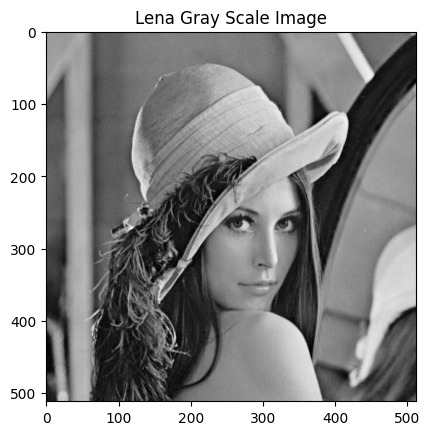

In [8]:
plt.imshow(f, cmap="gray")
plt.title("Lena Gray Scale Image")
plt.show()

## Sharpening the Image

In [21]:
e = prewitt_edge_detect(f)

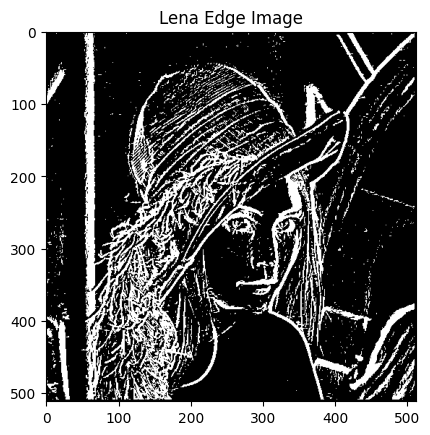

In [22]:
plt.imshow(e, cmap="gray")
plt.title("Lena Edge Image")
plt.show()

In [32]:
# constant
c = 40

In [33]:
g = sharpen(f, e, c)

## Displaying the final Image

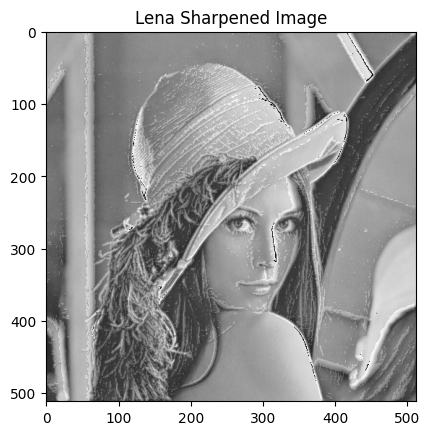

In [34]:
plt.imshow(g, cmap="gray")
plt.title("Lena Sharpened Image")
plt.show()